# Diamond Price Prediction - In depth analysis to apply different Regression Models

This notebook was created by: Alyosha Pulle,  Pedro Vasconcelos and Wenjuan Zhao

### Table of contents
1. [Business Understanding](#section_1)
2. [Data Understanding](#section_2)
     * 2.1) [Importing the Dataset](#section_2_1)
     * 2.2) [Data Features](#section_2_2)
     * 2.3) [Missing Values](#section_2_3)
     * 2.4) [Data Distributions](#section_2_4)
         * 2.4.1) [Categorical Variables](#section_2_4_1)
         * 2.4.2) [Continuos Variables](#section_2_4_2)
3. [Data Preparation](#section_3)
     * 3.1) [Drop index column](#section_3_1)
     * 3.2) [Normalizing target variable](#section_3_2)
         * 3.2.1) [Different transformations](#section_3_2_1)
     * 3.3) [Identify and Resolve Bad Data](#section_3_3)
     * 3.4) [Colinearity and Outliers](#section_3_4)
         * 3.4.1) [Inspect "z" outliers](#section_3_4_1)
         * 3.4.2) [Inspect "y" outliers](#section_3_4_2)
         * 3.4.3) [Inspect "table" outliers](#section_3_4_3)
     * 3.5) [Conversion of Categorical columns](#section_3_5)
     * 3.6) [Correlations Heatmap](#section_3_6)
4. [Data Modelling - OLS](#section_4)
    * 4.1) [OLS Baseline Regression Model](#section_4_1)
    * 4.2) [Split into Train/Test Datasets](#section_4_2)
    * 4.3) [Normalizing the Training Dataset](#section_4_3)
    * 4.4) [Tran/Test X and Y](#section_4_4)
    * 4.5) [OLS Regression Model](#section_4_5)
         * 4.5.1) [Feature Selection](#section_4_5_1)
         * 4.5.2) [OLS Error Terms](#section_4_5_2)
         * 4.5.3) [OLS Summary](#section_4_5_3)
         * 4.5.3) [OLS Model Performance and Residuals](#section_4_5_4)
5. [Other Regression Models](#section_5)
    * 5.1) [Lasso Regression](#section_5_1)
         * 5.1.1) [Achieved Lasso model](#section_5_1_1)
    * 5.2) [Ridge Regression](#section_5_2)
         * 5.2.1) [Achieved Ridge model](#section_5_2_1)
    * 5.3) [Elastic Net Regression](#section_5_3)
         * 5.3.1) [Achieved Ridge model](#section_5_2_1)
6. [K-Fold Cross Validation](#section_6)
7. [Conclusion](#section_7)
    * 7.1) [Fianl Model](#section_7_1)
    * 7.2) [Prediction Plot and Residuals](#section_7_2)
    * 7.3) [QQ Plot](#section_7_)

## <div id="section_1">1. Business Understanding</div>

### About Diamond
Diamonds were formed billions of years ago and are extremely rare because so few are able to survive the difficult journey from the pits of the earth to reach the earth’s surface. From the diamonds that are being mined today, only about 50 percent are thought to be high enough quality to be sold on the diamond market. 
### Diamond Cost and Quality
Each diamond is unique and has specific qualities that establish its value. Diamond pricing is much more complicated than gold. While every ounce of gold is the same, diamonds must be graded to determine their value. Even though the 4Cs is the basic standard for grading, a myriad other factors influence diamond value.
According to [GIA](https://4cs.gia.edu/en-us/4cs-diamond-quality/), 
globally accepted standard for describing diamonds: Colour, Clarity, Cut and Carat Weight.  
### Our Goal  
To analyse diamonds dataset by their cut, colour, clarity, price, and other attributes and find the best regression model to predict diamond price.


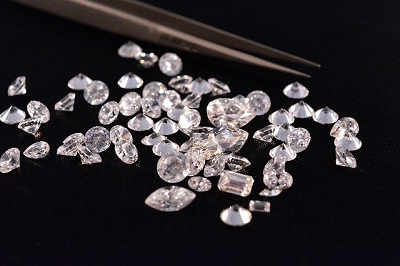
<center>Image by <a href="https://pixabay.com/users/11754907-11754907/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=4040800">Cherie Vilneff</a> from <a href="https://pixabay.com/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=4040800">Pixabay</a></center>

## <div id="section_2">2. Data Understanding</div>
As a first step we need to understand the features of the dataset.
<div id="section_2_1"></div>

### 2.1)Importing The Dataset 
#### Data source: https://www.kaggle.com/shivam2503/diamonds

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(context="notebook", style = 'darkgrid', font_scale = 1.5, color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('../input/diamonds/diamonds.csv')

<div id="section_2_2"></div>

### 2.2)  Data Features

In [ ]:
df.head()

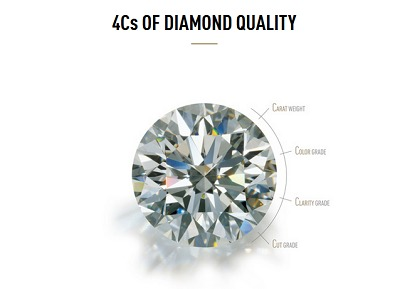

* <b>Carat</b> : Carat weight of the Diamond. 
* <b>Cut</b> : Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal 
* <b>Color</b> : Color of the Diamond. With D being the best and J the worst. 
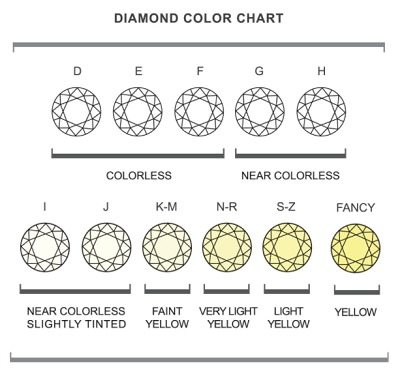

* <b>Clarity</b> : Diamond Clarity refers to the absence of the Inclusions and Blemishes.
(In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 
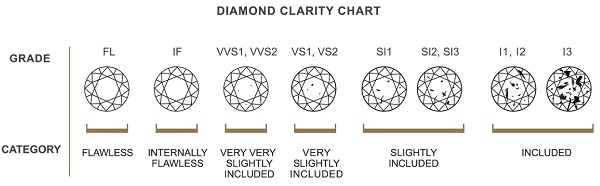

* <b>Depth</b> : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter. 

* <b>Table</b> : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter. 

* <b>X</b> : Length of the Diamond in mm. 

* <b>Y</b> : Width of the Diamond in mm. 

* <b>Z</b> : Height of the Diamond in mm. 

* <b>Target Variable - Price</b> : the Price of the Diamond. 
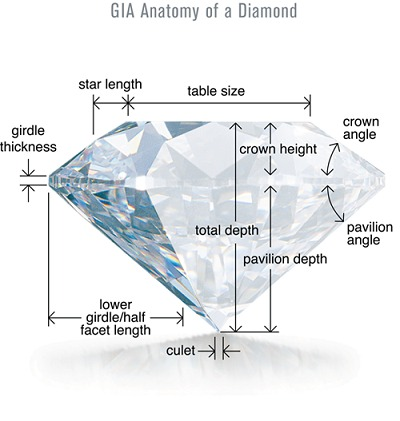

<div id="section_2_3"></div>

### 2.3) Missing values

In [ ]:
df.info()

There are 53,940 rows and 11 columns in the dataset. And you can see that there are no missing values in the dataset.

<div id="section_2_4"></div>

### 2.4) Data distributions

Checking the summary statistics.

In [ ]:
df.describe()

We can see that 'Unnamed: 0'  is a row index and can be dropped, we will drop it later in data preparation. Also the min value of x, y, z are 0, and the max value of x, y, z are quite high comparing to the 3rd quantile and min value, therefore, we need to investigate that later.

<div id="section_2_4_1"></div>

#### 2.4.1) Categorical variables

In [ ]:
# Plots by Cut
fig,ax=plt.subplots(ncols=3, figsize = (18,6))
fig.suptitle('Diamonds by Cut')
g1=sns.countplot(ax=ax[0],x="cut", data=df,order=['Fair','Good','Very Good','Premium','Ideal'])
g1.set(xlabel=None)
g1.tick_params(labelrotation=45)
g2=sns.boxplot(x="cut", y="price", order=['Fair','Good','Very Good','Premium','Ideal'], data=df, ax=ax[1])
g2.set(xlabel=None)
g2.tick_params(labelrotation=45)
g3=sns.violinplot(ax=ax[2],x="cut", y="price", order=['Fair','Good','Very Good','Premium','Ideal'], data=df,scale='width',legend=False)
g3.set(xlabel=None)
g3.tick_params(labelrotation=45)

We can see that most diamonds in the dataset has Ideal cut, and the Premium cut is most expensive, following by the Very Good cut. The price of most Good cut, Very Good cut, Premium cut and ideal cut are all around 1600.

In [ ]:
# Plots by Color
fig,ax=plt.subplots(ncols=3, figsize = (18,6))
fig.suptitle('Diamonds by Color')
g1=sns.countplot(ax=ax[0],x="color", data=df.sort_values(by=['color'],ascending=False))
g1.set(xlabel=None)
g2=sns.boxplot(x="color", y="price", data=df.sort_values(by=['color'],ascending=False), ax=ax[1])
g2.set(xlabel=None)
g3=sns.violinplot(ax=ax[2],x="color", y="price", data=df.sort_values(by=['color'],ascending=False),scale='width',legend=False)
g3.set(xlabel=None)

Most diamonds are in colour G, following by colour E, F.  
Most expensive colour are J and I, they have similar price. The next expensive colours are G and H.  
The price of most diamonds of every colour are similar, around 1500.

In [ ]:
# Plots by Clarity
fig,ax=plt.subplots(ncols=3, figsize = (18,6))
fig.suptitle('Diamonds by Clarity')
g1=sns.countplot(ax=ax[0],x="clarity", data=df.sort_values(by=['clarity']))
g1.set(xlabel=None)
g1.tick_params(labelrotation=45)
g2=sns.boxplot(x="clarity", y="price", data=df.sort_values(by=['clarity']), ax=ax[1])
g2.set(xlabel=None)
g2.tick_params(labelrotation=45)
g3=sns.violinplot(ax=ax[2],x="clarity", y="price", data=df.sort_values(by=['clarity']),scale='width',legend=False)
g3.set(xlabel=None)
g3.tick_params(labelrotation=45)

The most diamonds has SI1 clarity.  
The most expensive diamonds are with VS1 and VS2 clarity, and they have similar affect on the diamond price.  
The distribution of clarity VS1, VS2, VVS1 and VVS2 are similar.

<b>Diamonds Clarity by Cut and Price<b>

In [ ]:
sns.set(rc={'figure.figsize':(20,14)})
sns.catplot(x="clarity", y="price", hue="color", kind="point", col ='cut', data=df.sort_values(by=['clarity']),col_wrap=3)

<div id="section_2_4_2"></div>

#### 2.4.2) Continuous variables

In [ ]:
sns.set(rc={'figure.figsize':(20,14)})
p=df.hist(bins=50)

Unnamed is an index of the rows as in a uniform distribution.  
Table and depth look to be normally distributed.  
The price is exponentially distributed and will need to be transformed into a normal distribution for use in regression modelling.  
The x and y distributions are very similar in shape.

## <div id="section_3">3. Data Preparation</div>
Now that we understand the data we need to prepare the data for modelling by transforming the price target feature distribution, investigating the 0 values, adjusting/removing outliers and converting categorical features into numeric.

<div id="section_3_1"></div>

### 3.1) Drop the index column.

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

<div id="section_3_2"></div>

### 3.2) Normalizing target variable

As highlighted in the Data Understanding section, we can see that the price has an exponential distribution and requires to be transformed into a normal distribution for use in regression modelling.

In [ ]:
plt.figure(figsize = (3,3))
sns.kdeplot(df['price'])
plt.show()

<div id="section_3_2_1"></div>

#### 3.2.1) Different Transformations
We tried various transformations on the price target feature to convert into a normal distribution.  

In [ ]:
f, ax = plt.subplots(2, 3)
#Dataset price distribution
g1=sns.kdeplot(df['price'],ax=ax[0,0], legend = False)
g1.text(s='Price distribution', x=5000, y=0.0003, fontsize=16, multialignment='center')
g1.text(6000, 0.00027, r'$Skew$=%.2f' % (round(df.price.skew(),2)), fontsize=14)

#Log transformation
df['price_t'] = np.log( df['price'])
g2=sns.kdeplot(df['price_t'],ax=ax[0,1], legend = False)
g2.text(s='Log Transform', x=7, y=0.38, fontsize=16, multialignment='center')
g2.text(7.2, 0.36, r'$Skew$=%.2f' % (round(df.price_t.skew(),2)), fontsize=14)

#Log 10 transformation
df['price_t'] = np.sin( df['price'])
g3=sns.kdeplot(df['price_t'],ax=ax[0,2], legend = False)
g3.text(s='Sen Transform', x=-0.6, y=0.75, fontsize=16, multialignment='center')
g3.text(-0.5, 0.7, r'$Skew$=%.2f' % (round(df.price_t.skew(),2)), fontsize=14)

#Square Root Transformation
df['price_t'] = np.sqrt(df.price)
g4=sns.kdeplot(df['price_t'],ax=ax[1,0], legend = False)
g4.text(s='Square Root Transform', x=60, y=0.023, fontsize=16, multialignment='center')
g4.text(70, 0.020, r'$Skew$=%.2f' % (round(df.price_t.skew(),2)), fontsize=14)

#Cubic root Transformation
df['price_t'] = np.cbrt(df.price)
g5=sns.kdeplot(df['price_t'],ax=ax[1,1], legend = False)
g5.text(s='Cubic Root Transform', x=13, y=0.11, fontsize=16, multialignment='center')
g5.text(15, 0.10, r'$Skew$=%.2f' % (round(df.price_t.skew(),2)), fontsize=14)

#Exponential Squared Transformation
df['price_t'] = (df.price)**2
g6=sns.kdeplot(df['price_t'],ax=ax[1,2], legend = False)
g6.text(s='Exponential Transform', x=1e8, y=3e-8, fontsize=16, multialignment='center')
g6.text(1.4e8, 2.6e-8, r'$Skew$=%.2f' % (round(df.price_t.skew(),2)), fontsize=14)

From above, decided to go with the log transformation as it was the closest we could get to a normal distribution and it gives a very low skew.

In [ ]:
df2 = df.copy()
df2['price_t'] = np.log(df['price'])
df2.drop(['price'], axis=1, inplace=True)

<div id="section_3_3"></div>

### 3.3) Identifiy and Resolve Bad Data

As indentifed in the Data Understanding we have diamond dimensions (x, y, z) of size 0.

In [ ]:
# Identify the 0 z value rows
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

Compared to the total number of rows (53,940) the percentage is very small. So can drop these 20 rows.

In [ ]:
df2 = df2[df2.z != 0]
df2.describe()

Can see now that all the 0 min values are removed for x, y and z.
The max is very high, relative to mean and std for the y and z and indicates that we have outliers.  


<div id="section_3_4"></div>

### 3.4) Collinearity and Outliers

Compare the continuous variables for collinearity.

In [ ]:
sns.pairplot(df2[['price_t','carat','depth','table','x','y','z']])

Can see collinearity between carat, x, y and z.

From the scatter plots, can see that there are large outliers in the table, y and z columns as highlighted in below snippet from the plots. These will need to be investigated and adjusted or removed from the dataset.
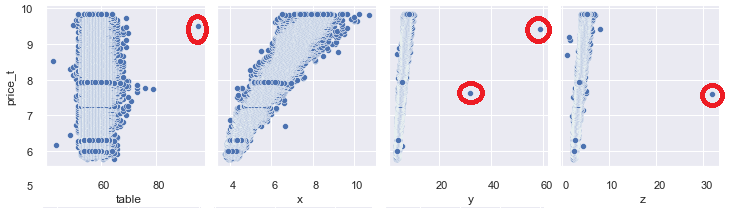

<div id="section_3_4_1"></div>

#### 3.4.1) Inspect the max z value row.

In [ ]:
df2.loc[df2.z > 6].sort_values(by=['z']).head(15)

We can see the max z (31.8mm) is much larger than the next highest of 8.06.  
We did a clamp transformation by replacing the z outlier with the next highest value.

In [ ]:
df2.z.replace(df2.z.max(), np.nan, inplace=True)
df2.z.replace(np.nan, df2.z.max(), inplace=True)

<div id="section_3_4_2"></div>

#### 3.4.2) Inspect the max y value rows.

In [ ]:
df2.loc[df2.y > 9.5].sort_values(by=['y']).head(15)

We did a clamp transformation by replacing the two y outlier values with the next highest value of 10.54.

In [ ]:
df2.y.replace(df2.y.max(), np.nan, inplace=True)   # 1st
df2.y.replace(df2.y.max(), np.nan, inplace=True)   # 2nd
df2.y.replace(np.nan, df2.y.max(), inplace=True)

<div id="section_3_4_3"></div>

#### 3.4.3) Inspect the max table value rows.

In [ ]:
df2.loc[df2.table > 75].sort_values(by=['table']).head(15)

We did a clamp transformation by replacing the table outlier value with the next highest value of 79.

In [ ]:
# Replace the table outlier value with the next highest value
df2.table.replace(df2.table.max(), np.nan, inplace=True)
df2.table.replace(np.nan, df2.table.max(), inplace=True)

Regenerating the pairplots...

We now see a better distribution of the features.

In [ ]:
sns.pairplot(df2[['price_t','carat','depth','table','x','y','z']])

<div id="section_3_5"></div>

### 3.5) Conversion of Categorical columns
To fit a regression line we need all features to be numeric.
The cut, color and clarity features are the categorical columns which need to be converted.

In [ ]:
# Dropping the first column from the categorical features in the dataset
cut = pd.get_dummies(df2.cut, drop_first = True)
color = pd.get_dummies(df2.color, drop_first = True)
clarity = pd.get_dummies(df2.clarity, drop_first = True)

# Add the cut, color and clarity datasets to the main dataset
df2 = pd.concat([df2, cut, color, clarity], axis = 1)

# Drop the cut, color and clarity features as have created the dummies for the features
df2.drop(['cut', 'color', 'clarity'], axis = 1, inplace = True)

In [ ]:
# Move the target 'price_t' column to the first column
price_col = df2.pop('price_t')
df2.insert(0, price_col.name, price_col)
pd.options.display.max_columns = None
df2.head()

<div id="section_3_6"></div>

### 3.6) Correlations Heatmap

As the dataset is now cleaned and prepared to run the regression models we will check the correllation with all features.

In [ ]:
sns.set(rc={'figure.figsize':(20,14)})
sns.heatmap(df2.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

We can see that carat, x, y and z are highly correllated (dark red regions) with values of 1 or near to 1.
We will investigate removing the highly correllated features in the Data Modelling section.

## <div id="section_4">4. Data Modelling- OLS</div>

<div id="section_4_1"></div>

### 4.1) OLS Baseline Regression Model
We ran a baseline OLS regression model with the cleaned data.

In [ ]:
# Running an OLS as a baseline model
np.random.seed(0)
y = df2.price_t
X = df2.drop(['price_t'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<br/>
The model gives an R2 of 0.98 and AIC and BIC is high. The model is run on all the features and is not normalised so is cannot be relied on.  


<div id="section_4_2"></div>

### 4.2) Split Into Train/Test Datasets

Before using the data for modelling we need to split the dataset into training and test datasets.  
Training to create the models and test to validate the same.  
We chose to split with a 70:30 ratio.

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df2_train, df2_test = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state = 22)


<div id="section_4_3"></div>

### 4.3) Normalizing the Training Dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
num_vars = ['carat','depth','table','x','y','z','price_t']
df2_train[num_vars] = scalar.fit_transform(df2_train[num_vars])

In [ ]:
df2_train.describe()

<div id="section_4_4"></div>

### 4.4) Train/Test X and Y datasets

In [ ]:
np.random.seed(0)
y = df2_train.price_t
X = df2_train.drop(['price_t'], axis=1)

y_val = df2_test.price_t
X_val = df2_test.drop(['price_t'], axis=1)

<div id="section_4_5"></div>

### 4.5) OLS Regression Model

<div id="section_4_5_1"></div>

#### 4.5.1) Feature Selection
Now that we have a normalised training dataset. We need to perform feature selection to identify the most significant independent variables. We used the VIF and p-values to reduce the features by eliminating a single feature with each iterations until all VIF scores are < 5 and the p-values are <= 0.05. 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

Running the OLS model and the VIF scores on the normalised training dataset....

In [ ]:
np.random.seed(0)
X_lm = sm.add_constant(X)
model = sm.OLS(y, X_lm)
results = model.fit()
results.summary()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Here we can see that the p-values are below 0.05 and the feature with the highest VIF score > 5 is z. Therefore z can be dropped.

In [ ]:
X.drop(['z'], axis=1, inplace=True)

In [ ]:
# Run the OLS model
np.random.seed(0)
X_lm = sm.add_constant(X)
model = sm.OLS(y, X_lm)
results = model.fit()
results.summary()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Here we can see that the p-values are below 0.05 and the feature with the highest VIF score > 5 is y. Therefore y can be dropped.

In [ ]:
X.drop(['y'], axis=1, inplace=True)

In [ ]:
# Run the OLS model
np.random.seed(0)
X_lm = sm.add_constant(X)
model = sm.OLS(y, X_lm)
results = model.fit()
results.summary()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Here we can see that the p-values are below 0.05 and the feature with the highest VIF score > 5 is x. Therefore x can be dropped.

In [ ]:
X.drop(['x'], axis=1, inplace=True)

In [ ]:
# Run the OLS model
np.random.seed(0)
X_lm = sm.add_constant(X)
model = sm.OLS(y, X_lm)
results = model.fit()
results.summary()

Here we can see that the p-value for "Depth" is above 0.05. Working off the p-value we decided to drop "Depth".  
As the first preference is to the p-value we do not need to run the VIF in this instance.

In [ ]:
X.drop(['depth'], axis=1, inplace=True)

In [ ]:
# Run the OLS model
np.random.seed(0)
X_lm = sm.add_constant(X)
model = sm.OLS(y, X_lm)
results = model.fit()
results.summary()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Here we can see that the p-values are below 0.05 and the feature with the highest VIF score > 5 is table. Therefore table can be dropped.

In [ ]:
X.drop(['table'], axis=1, inplace=True)

In [ ]:
# Run the OLS model
np.random.seed(0)
X_lm = sm.add_constant(X)
model = sm.OLS(y, X_lm)
results = model.fit()
results.summary()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Here we can see that the p-values are below 0.05 and the feature with the highest VIF score > 5 is Ideal. Therefore Ideal can be dropped.

In [ ]:
X.drop(['Ideal'], axis=1, inplace=True)

In [ ]:
# Run the OLS model
np.random.seed(0)
X_lm = sm.add_constant(X)
model = sm.OLS(y, X_lm)
results = model.fit()
results.summary()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

We now see that there are no more p-values > 0..05 and all VIF scores are < 5. Therefore these variables are the set of selected features for the model.  
From the R2 we can see that we are getting a score of 0.887. We next need to check the Error Terms of the model to verify whether the distribution is a normal distribution.

<div id="section_4_5_2"></div>

#### 4.5.2) OLS Error Terms

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
y_train_price = results.predict(X_lm)

# Plot the histogram of the error terms
fig = plt.figure(figsize=(5,5))
sns.distplot((y - y_train_price), bins = 40)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  

The Error Terms are very close to a normal distribution which is a requirement for a regression model. The reason for the left skew could be due to the target "price_t" feature not following a perfect normal distribution.  

<div id="section_4_5_3"></div>

#### 4.5.3) OLS Summary

Finally running the model against the Test dataset for predictive capability.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Comparing the model against the Test dataset and making predictions
# 1. Scale the test data
df2_test_copy = df2_test.copy()
num_vars = ['carat','depth','table','x','y','z','price_t']
df2_test_copy[num_vars] = scalar.fit_transform(df2_test_copy[num_vars])

# 2. Run the model against the test features.
y_test = df2_test_copy['price_t']
X_test = df2_test_copy.drop(['price_t'], axis=1)

X_test_lm = sm.add_constant(X_test)
X_test_lm.drop(['x','y','z','depth','table','Ideal'], axis=1, inplace=True)

y_pred = results.predict(X_test_lm)

# Output the R2 score for the test data.
print("Mean Absolute Error: "+ str(round(mean_absolute_error(y_test, y_pred),4)))
print('R Squared: ' + str(round(r2_score(y_test, y_pred),4)) )
print('Mean Squared Error: ' + str(round(mean_squared_error(y_test, y_pred),4)))

<div id="section_4_5_4"></div>

#### 4.5.4) OLS model Performance and Residuals

In [ ]:
from sklearn.metrics import median_absolute_error, r2_score
f, (ax0, ax1) = plt.subplots(1, 2,)
y_pred = results.predict(X_test_lm)
y_val2 = pd.DataFrame(y_test)
y_pred2 = pd.DataFrame(y_pred)


ax0.scatter(y_val2, y_pred2, s=8)
ax0.plot([0, 1], [0, 1], '--k')
ax0.set_ylabel('True target')
ax0.set_xlabel('Predicted target')
ax0.text(s='OLS \n with target transformation', x=0,
            y=1, fontsize=14, multialignment='center')
ax0.text(0, 0.9, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_val2, y_pred2), median_absolute_error(y_val2, y_pred2)))
ax0.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))


ax1.scatter(y_pred2, (y_pred2.values - y_val2.values), s=8)
ax1.set_ylabel('Residual')
ax1.set_xlabel('Predicted target')
ax1.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

plt.show()

Our R^2 = 0.86 and we got a U-shaped Residual plot which is suggesting a better fit for a non-linear model, which will explore in the next section.

# <div id="section_5">5. Other Regression Models</div>

In preparation of creating the Ridge, Lasso and Elastic Net models we created the y and X for the entire cleaned dataset.  
Also created datasets for the scaled validation dataset.

In [ ]:
# Importing libraries
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
# Using df2 which is the cleaned dataset and already split into df_train and df_test
y = df2['price_t']
X = df2.drop(['price_t'], axis=1)

In [ ]:
np.random.seed(0)
# Train is normalised
y_train = df2_train.price_t
X_train = df2_train.drop(['price_t'], axis=1)

# Test is not normalised
y_val = df2_test.price_t
X_val = df2_test.drop(['price_t'], axis=1)

In [ ]:
num_vars = ['carat','depth','table','x','y','z','price_t']
df2_test_scaled = df2_test.copy()
df2_test_scaled[num_vars] = scalar.fit_transform(df2_test_scaled[num_vars])

y_val_scaled = df2_test_scaled.price_t
X_val_scaled = df2_test_scaled.drop(['price_t'], axis=1)

<div id="section_5_1"></div>

## 5.1) Lasso Regression

Run the cross validation, find the best alpha, refit the model on all the data with that alpha.

In [ ]:
alphavec = 10**np.linspace(-3,3,200)   # alpha varies from 0.001 to 1000
lasso_model = LassoCV(alphas = alphavec, cv=5)
#lasso_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train, y_train)

# This is the best alpha value found
lasso_model.alpha_ 

<div id="section_5_1_1"></div>

### 5.1.1) Achieved Lasso model

In [ ]:
list(zip(X_train.columns, lasso_model.coef_))

In [ ]:
print("Accuracy: "+ str(round(lasso_model.score(X_train, y_train),4)*100) + '%')
print("Mean Absolute Error: "+ str(round(mean_absolute_error(y_val_scaled, lasso_model.predict(X_val_scaled)),4)))
print('R Squared: ' + str(round(r2_score(y_val_scaled, lasso_model.predict(X_val_scaled)),4)) )
print('Mean Squared Error: ' + str(round(mean_squared_error(y_val_scaled, lasso_model.predict(X_val_scaled)),4)))

<div id="section_5_2"></div>

## 5.2) Ridge Regression

Run the cross validation, find the best alpha, refit the model on all the data with that alpha.

In [ ]:
alphavec = 10**np.linspace(-3,3,200)   # alpha varies from 0.001 to 1000
ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_train, y_train)
# This is the best alpha value found
ridge_model.alpha_

<div id="section_5_2_1"></div>

### 5.2.1) Achieved Ridge model

In [ ]:
# display all coefficients in the model with optimal alpha
list(zip(X_train.columns, ridge_model.coef_))

In [ ]:
print("Accuracy: "+ str(round(ridge_model.score(X_train, y_train),4)*100) + '%')
print("Mean Absolute Error: "+ str(round(mean_absolute_error(y_val_scaled, ridge_model.predict(X_val_scaled)),4)))
print('R Squared: ' + str(round(r2_score(y_val_scaled, ridge_model.predict(X_val_scaled)),4)) )
print('Mean Squared Error: ' + str(round(mean_squared_error(y_val_scaled, ridge_model.predict(X_val_scaled)),4)))

<div id="section_5_3"></div>

## 5.3) Elastic Net Regression

Run the cross validation, find the best alpha, refit the model on all the data with that alpha.

In [ ]:
alphavec = 10**np.linspace(-3,3,200)   # alpha varies from 0.001 to 1000
elasticnet_model = ElasticNetCV(alphas = alphavec, cv=5)
elasticnet_model.fit(X_train, y_train)
# This is the best alpha value it found
elasticnet_model.alpha_

<div id="section_5_3_1"></div>

### 5.3.1) Achieved Elastic Net model

In [ ]:
# display all coefficients in the model with optimal alpha
list(zip(X_train.columns, ridge_model.coef_))

In [ ]:
print("Accuracy: "+ str(round(elasticnet_model.score(X_train, y_train),4)*100) + '%')
print("Mean Absolute Error: "+ str(round(mean_absolute_error(y_val_scaled, elasticnet_model.predict(X_val_scaled)),4)))
print('R Squared: ' + str(round(r2_score(y_val_scaled, elasticnet_model.predict(X_val_scaled)),4)) )
print('Mean Squared Error: ' + str(round(mean_squared_error(y_val_scaled, elasticnet_model.predict(X_val_scaled)),4)))

# <div id="section_6">6. K-folder Cross Validation</div>

To help the evaluation of our models we will be using k-fold cross validation. 
We have chosen k=10.
With this method we will be splitting our data into 10 groups and test their fit into each one.

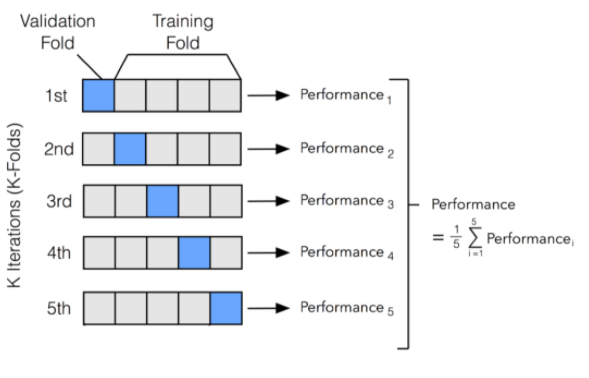

In [ ]:
## cross validation using KFold (on the 100% dataset, without manually splitting)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Creating Linear Regression Model
lm = LinearRegression()
lm.fit(X_train, y_train)
#print(f'Linear regression val R^2: {lm.score(X_val_scaled, y_val_scaled):.3f}')

# Combine scaled X and y
X_scaled = X_train.copy().append(X_val_scaled)
y_scaled = y_train.copy().append(y_val_scaled)

# Split data to k-folds and impemement K-fold validation
kf = KFold(n_splits=10, shuffle=True, random_state = 1)

# Linear model with selected features
cvs_lm = cross_val_score(lm, X_scaled.drop(['x','y','z','table','depth','Good'],axis=1), y_scaled, cv=kf, scoring='r2')
print(cvs_lm)
print('Linear regression cv R^2:', round(np.mean(cvs_lm),3), '+-', round(np.std(cvs_lm),3) )

cvs_ridge = cross_val_score(ridge_model, X_scaled, y_scaled, cv=kf, scoring='r2')
print(cvs_ridge)
print('Ridge regression cv R^2:', round(np.mean(cvs_ridge),3), '+-', round(np.std(cvs_ridge),3) )

cvs_lasso = cross_val_score(lasso_model, X_scaled, y_scaled, cv=kf, scoring='r2')
print(cvs_lasso)
print('Lasso regression cv R^2:', round(np.mean(cvs_lasso),3), '+-', round(np.std(cvs_lasso),3) )

cvs_elasticnet = cross_val_score(elasticnet_model, X_scaled, y_scaled, cv=kf, scoring='r2')
print(cvs_elasticnet)
print('ElasticNet regression cv R^2:', round(np.mean(cvs_elasticnet),3), '+-', round(np.std(cvs_elasticnet),3) )

# <div id="section_7">7. Conclusion</div>

After having built our four different models and run the k-fold cross validation can now select our final model.

Regression Model Name | Best alpha | Accuracy | Mean Absolute Error | R Square (model build) | Mean Squared Error | 10-fold cross validation
-------------|------|------|------|------|------|------ 
OLS  | - | - | - | 0.982 | -|0.981 +/- 0.001
OLS With FR*  | - | -| 0.065 | 0.8493 | 0.0094|0.881 +/- 0.003
Lasso Regression | 0.001 | 95.71% | 0.0429| 0.9433 | 0.0035|0.953 +/- 0.002
Ridge Regression  | 0.148 | 98.2% | 0.0552 | 0.936 | 0.004|0.98 +/- 0.001
Elastic Net Regression  | 0.001 | 96.33% | 0.0464 | 0.938 | 0.0038|0.958 +/- 0.001

*=Feature Reduction

We got very good results from all of them, with R^2 > 0.85. The Ridge, Lasso and Elastic Net are performing very similarly and they would be very effictive if applied.

We do not advise the use of the Linear Regression (OLS) because it is including all the features, with high VIF scores as explained in section 4.5.  
As we can see in the "OLS With FR" which applied feature reduction the R^2 dropped to 0.881.  
<br/>
<b>Since the R^2 of the Ridge Regression after the k-fold cross validation is the highest (0.98) and the MEA is very low (0.0552) we will select it as our Final Model</b>.

<div id="section_7_1"></div>

## 7.1) Our Final Model

<div id="section_7_2"></div>

## 7.2) Prediction Plot and Residuals

In [ ]:
X_scaled = X_train.copy().append(X_val_scaled)
y_scaled = y_train.copy().append(y_val_scaled)
from sklearn.metrics import median_absolute_error, r2_score
f, (ax0, ax1) = plt.subplots(1, 2,)
y_pred = ridge_model.predict(X_val_scaled)
y_val2 = pd.DataFrame(y_val_scaled)
y_pred2 = pd.DataFrame(y_pred)

ax0.scatter(y_val2, y_pred2, s=8)
ax0.set_ylabel('True target')
ax0.set_xlabel('Predicted target')
ax0.text(s='Ridge regression', x=0,
            y=1, fontsize=16, multialignment='center')
ax0.text(0, 0.95, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_val2, y_pred2), median_absolute_error(y_val2, y_pred2)), fontsize=14)
ax0.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1.scatter(y_pred2, (y_pred2.values - y_val2.values), s=8)
ax1.set_ylabel('Residual')
ax1.set_xlabel('Predicted target')
ax1.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

plt.show()

The selected model is performing well on predicting our target variable. 
From our residuals plot we can see it is centred around 0.

<div id="section_7_3"></div>

## 7.3) QQ Plot for residual analysis

In [ ]:
import scipy.stats as stats
fit = ridge_model.fit(X,y) # for later use
stats.probplot(fit.predict(X), dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.figure(figsize=(4,4))
plt.show()

Our QQ-Plot is lightly tailed and does not follow a normal distribution.